In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
def gauss(x, a, m, s):
    return a*np.exp(-(x-m)**2/2/s**2)

def func(x, a1, m1, s1, a2, m2, s2):
    return gauss(x, a1, m1, s1) + gauss(x, a2, m2, s2)

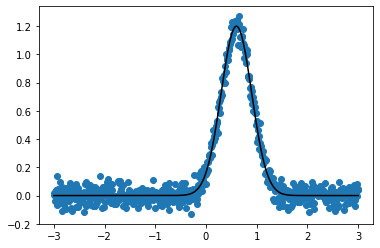

In [3]:
params = [1.2, 0.6, 0.3]
X = np.linspace(-3, 3, 600)
Y = [gauss(x ,*params) + np.random.randn()*0.05 for x in X]

plt.scatter(X, Y)
plt.plot(X, [gauss(x ,*params) for x in X], color='k')
plt.show()

In [4]:
import curve_fit

In [5]:
def restriction(params):
    a1, m1, s1, s_err = params
    return (0<a1 and 0<s1 and 0<s_err)
def prior_prob(params):
    if restriction(params):
        return 1
    else:
        return 0

In [6]:
model = curve_fit.MH(gauss, X, Y, [1.2+0.1, 0.6+0.1, 0.3+0.1, 0.01+0.01], [1e-3]*4, prior_prob)

model.sampling(10**5)
samples = np.array(model.samples)
ll_samples = np.array(model.ll_samples)

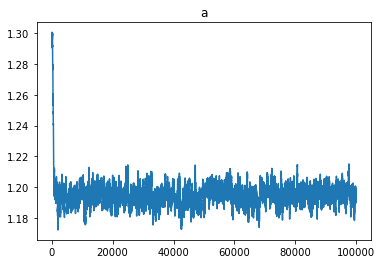

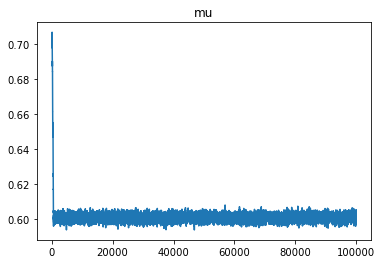

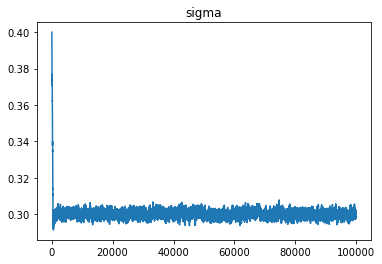

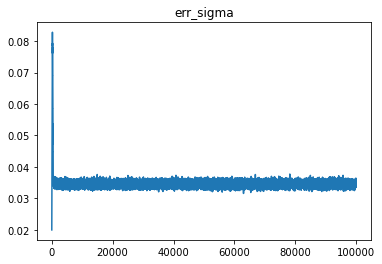

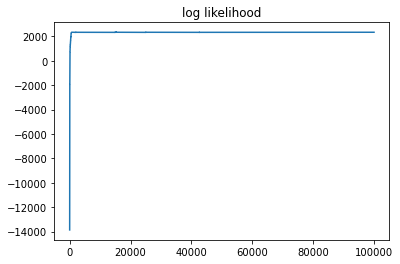

In [7]:
for i,name in enumerate(["a", "mu", "sigma", "err_sigma"]):
    plt.plot(samples[:, i])
    plt.title(name)
    plt.show()

plt.plot(ll_samples)
plt.title("log likelihood")
plt.show()

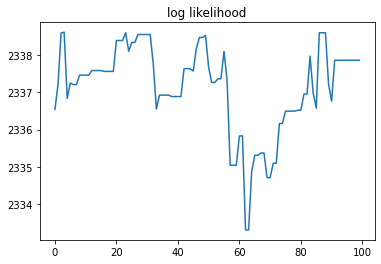

In [8]:
plt.plot(ll_samples[-10**2:])
plt.title("log likelihood")
plt.show()

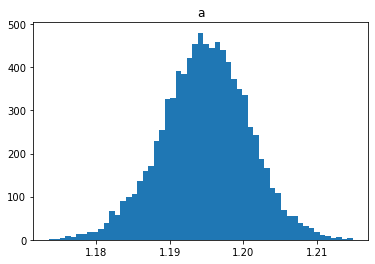

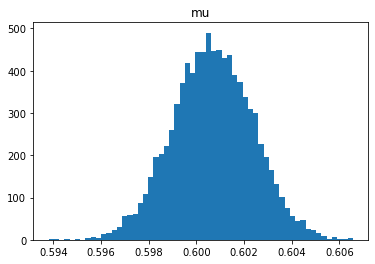

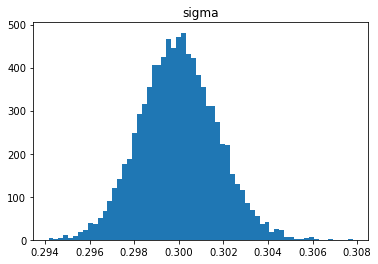

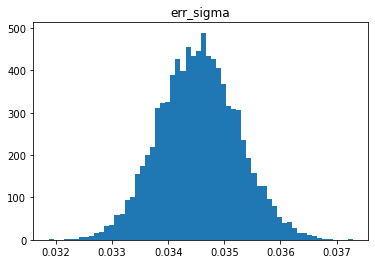

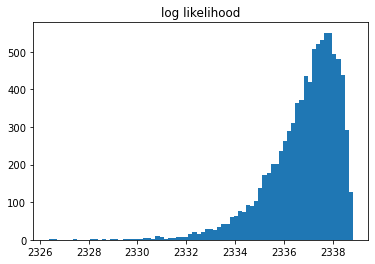

In [9]:
burnin = 10**4
step=10
for i,name in enumerate(["a", "mu", "sigma", "err_sigma"]):
    plt.hist(samples[burnin::step, i], bins='auto')
    plt.title(name)
    plt.show()

plt.hist(ll_samples[burnin::step], bins='auto')
plt.title("log likelihood")
plt.show()

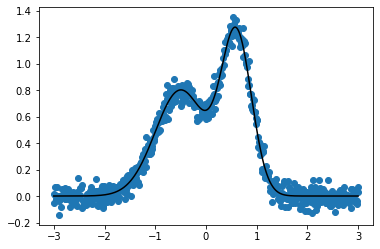

In [10]:
params = [1.2, 0.6, 0.3, 0.8, -0.5, 0.5]
X = np.linspace(-3, 3, 600)
Y = [func(x ,*params) + np.random.randn()*0.05 for x in X]

plt.scatter(X, Y)
plt.plot(X, [func(x ,*params) for x in X], color='k')
plt.show()

In [11]:
def restriction(params):
    a1, m1, s1, a2, m2, s2, s_err = params
    return (0<a1 and 0<s1 and 0<a2 and 0<s2 and m2<m1 and 0<s_err)
def prior_prob(params):
    if restriction(params):
        return 1
    else:
        return 0

In [12]:
model = curve_fit.MH(func, X, Y, [1.2+0.1, 0.6+0.1, 0.3+0.1, 0.8+0.1, -0.5-0.1, 0.5+0.1, 0.05-0.01], [1e-3]*7, prior_prob)

model.sampling(10**5)
samples = np.array(model.samples)
ll_samples = np.array(model.ll_samples)

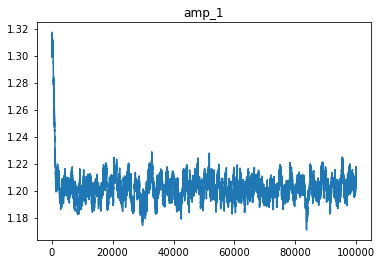

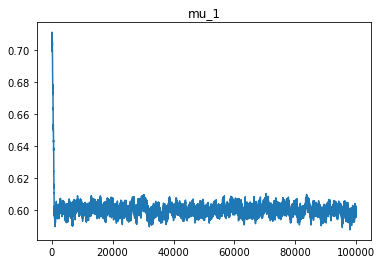

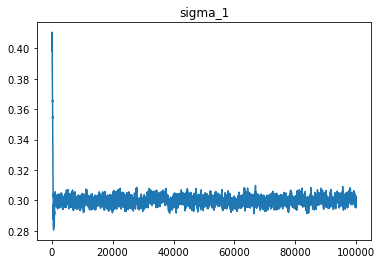

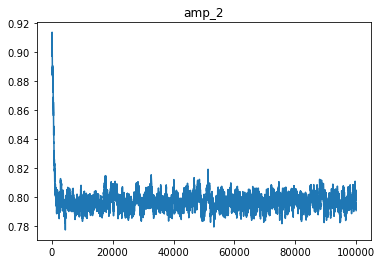

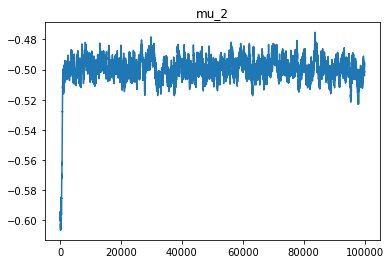

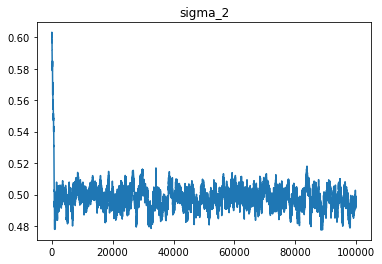

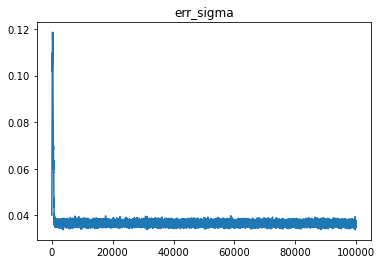

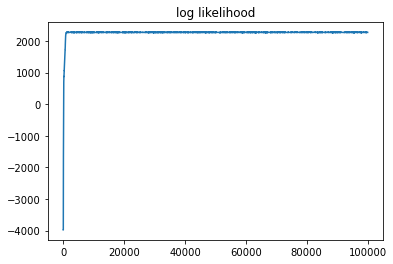

In [13]:
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.plot(samples[:, i])
    plt.title(name)
    plt.show()

plt.plot(ll_samples)
plt.title("log likelihood")
plt.show()

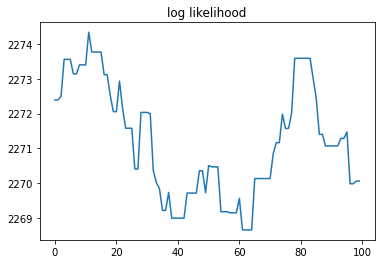

In [14]:
plt.plot(ll_samples[-10**2:])
plt.title("log likelihood")
plt.show()

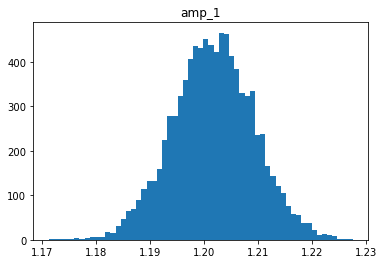

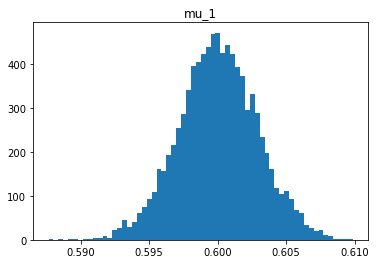

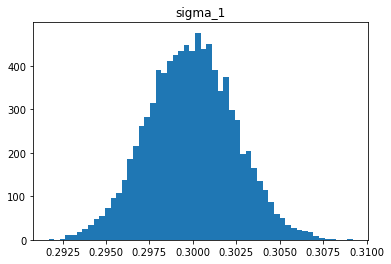

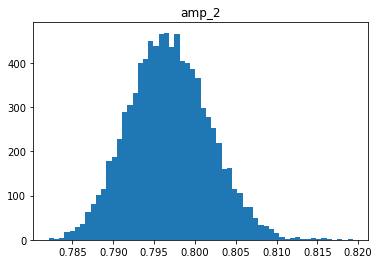

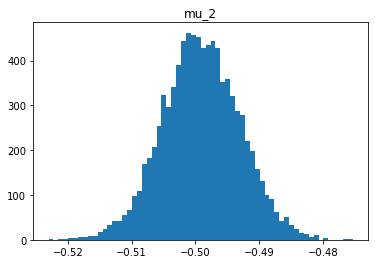

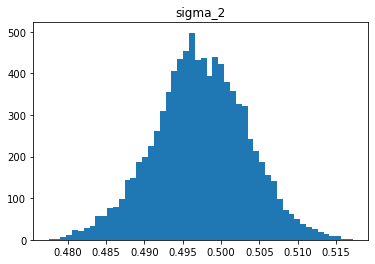

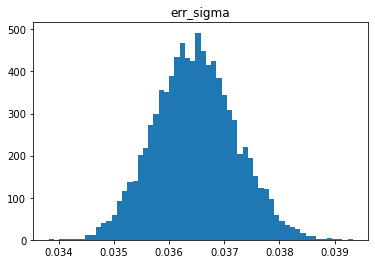

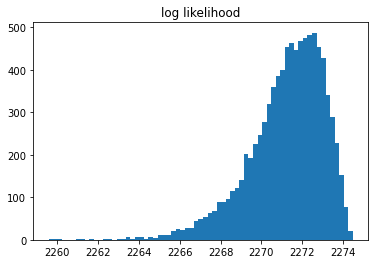

In [15]:
burnin = 10**4
step=10
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.hist(samples[burnin::step, i], bins='auto')
    plt.title(name)
    plt.show()

plt.hist(ll_samples[burnin::step], bins='auto')
plt.title("log likelihood")
plt.show()

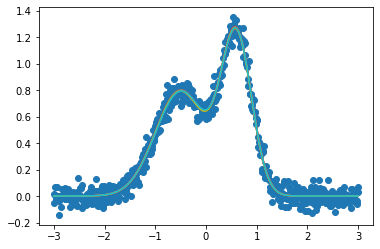

In [16]:
plt.scatter(X, Y)
for i in np.random.choice(range(burnin, len(model.ll_samples)), 10):
    plt.plot(X, [model.func(x ,*samples[i, :-1]) for x in X])
plt.show()

In [17]:
samples[-1, :-1]

array([ 1.21585349,  0.59643827,  0.29768449,  0.79086623, -0.50401313,
        0.49661191])

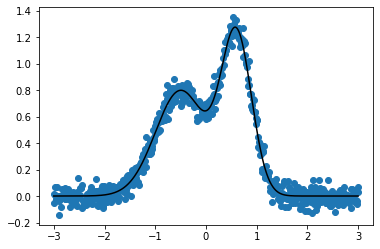

In [18]:
from scipy.optimize import curve_fit as cf
popt, pcov = cf(func, X, Y, p0=[1.2+0.1, 0.6+0.1, 0.3+0.1, 0.8+0.1, -0.5-0.1, 0.5+0.1])

plt.scatter(X, Y)
plt.plot(X, [func(x ,*popt) for x in X], color='k')
plt.show()

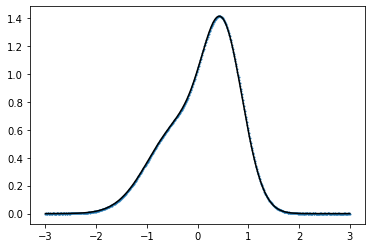

In [19]:
params = [1.2, 0.5, 0.4, 0.6, -0.4, 0.6]
X = np.linspace(-3, 3, 600)
Y = [func(x ,*params) + np.random.randn()*0.001 for x in X]

plt.scatter(X, Y, s=1)
plt.plot(X, [func(x ,*params) for x in X], color='k')
plt.show()

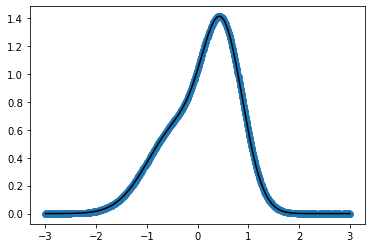

array([ 1.20019927,  0.50011508,  0.40002845,  0.60011392, -0.40015737,
        0.59963809])

In [20]:
from scipy.optimize import curve_fit as cf
popt, pcov = cf(func, X, Y)

plt.scatter(X, Y)
plt.plot(X, [func(x ,*popt) for x in X], color='k')
plt.show()

popt

In [21]:
popt

array([ 1.20019927,  0.50011508,  0.40002845,  0.60011392, -0.40015737,
        0.59963809])

In [22]:
model = curve_fit.MH(func, X, Y, [0.5]*7, [1e-3]*7, prior_prob)

model.sampling(10**5)
samples = np.array(model.samples)
ll_samples = np.array(model.ll_samples)

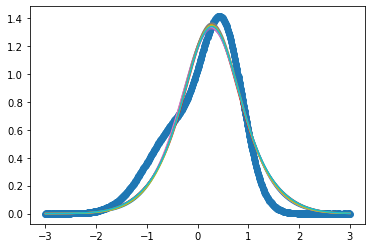

array([0.692138  , 0.27193481, 0.78821397, 0.65132874, 0.27113792,
       0.45302543, 0.06922085])

In [23]:
plt.scatter(X, Y)
for i in np.random.choice(range(burnin, len(model.ll_samples)), 10):
    plt.plot(X, [model.func(x ,*samples[i, :-1]) for x in X])
plt.show()

samples[10**4:, :].mean(axis=0)

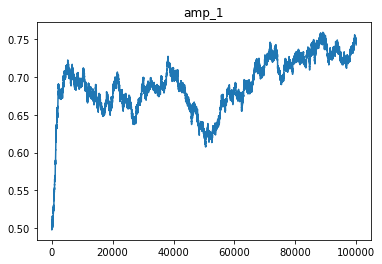

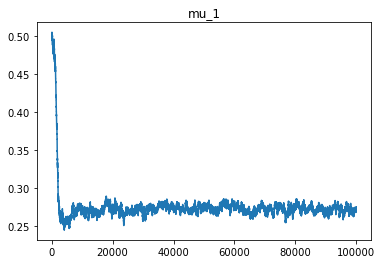

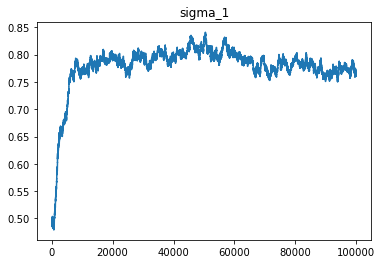

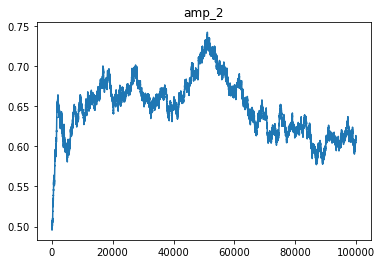

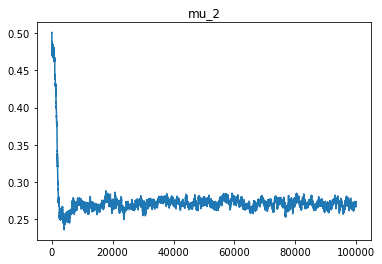

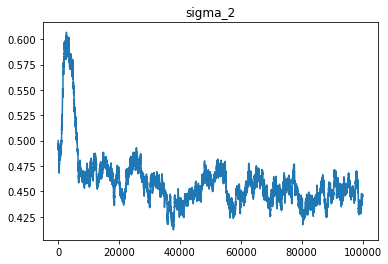

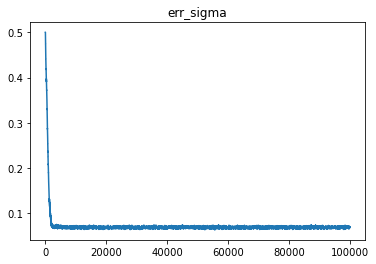

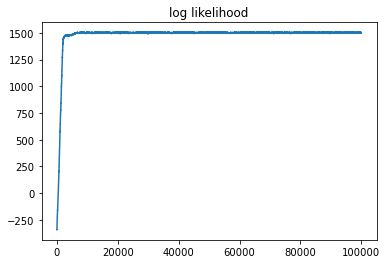

In [24]:
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.plot(samples[:, i])
    plt.title(name)
    plt.show()

plt.plot(ll_samples)
plt.title("log likelihood")
plt.show()

In [25]:
model.sampling(10**5)
samples = np.array(model.samples)
ll_samples = np.array(model.ll_samples)

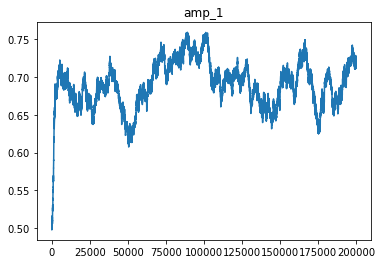

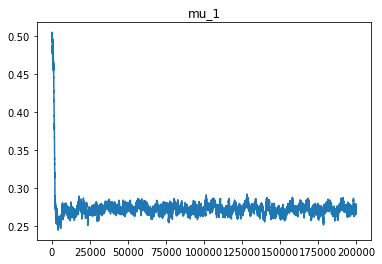

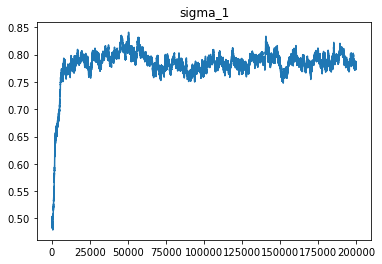

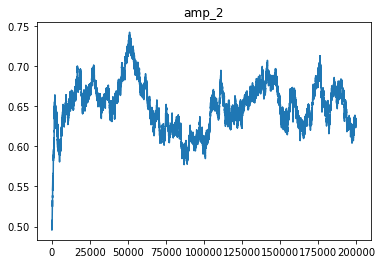

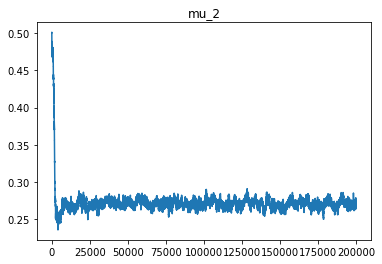

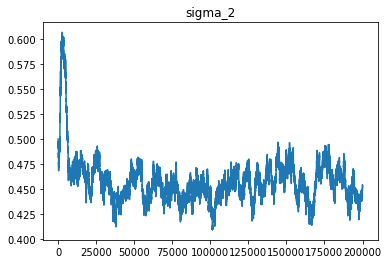

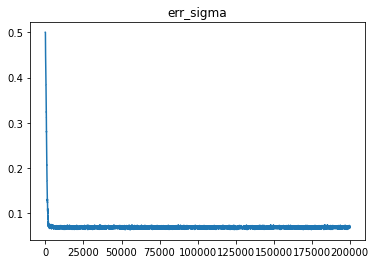

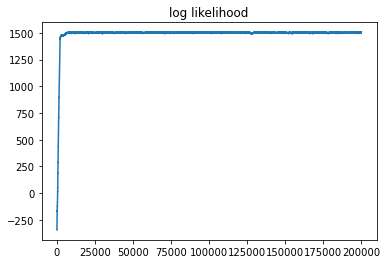

In [26]:
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.plot(samples[:, i])
    plt.title(name)
    plt.show()

plt.plot(ll_samples)
plt.title("log likelihood")
plt.show()

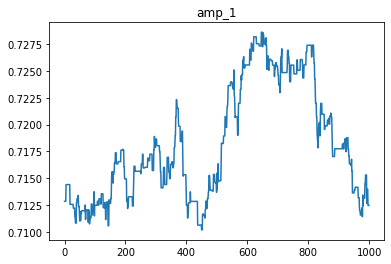

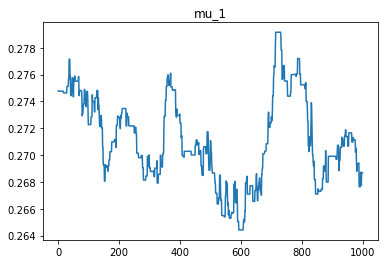

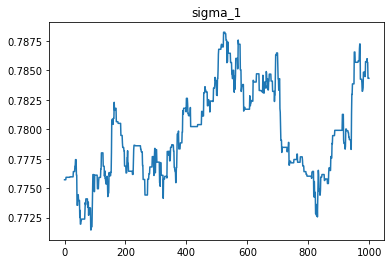

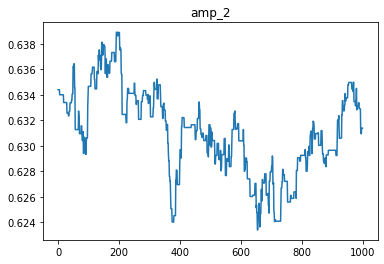

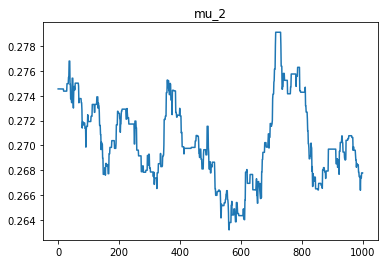

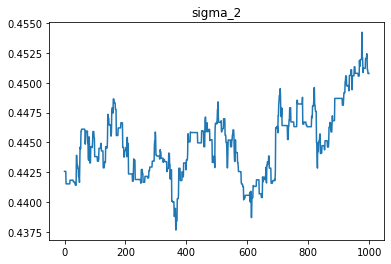

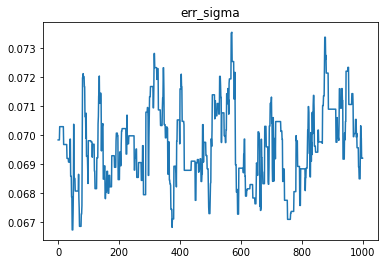

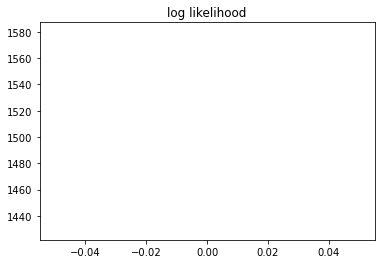

In [27]:
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.plot(samples[-10**3:, i])
    plt.title(name)
    plt.show()

plt.plot(ll_samples[-10**3])
plt.title("log likelihood")
plt.show()

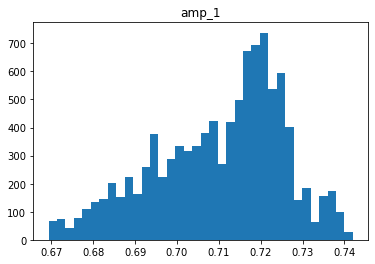

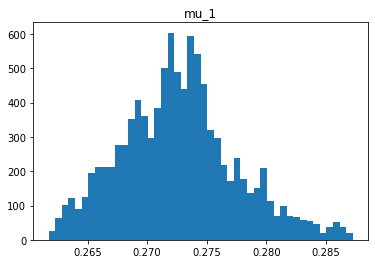

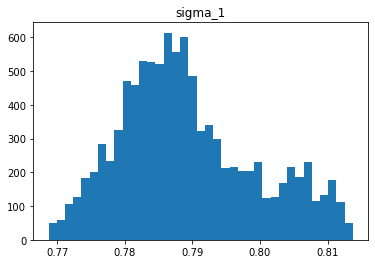

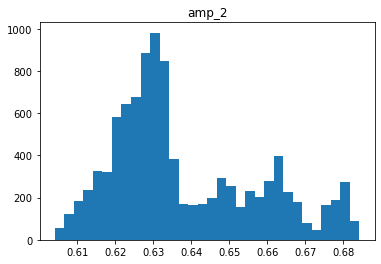

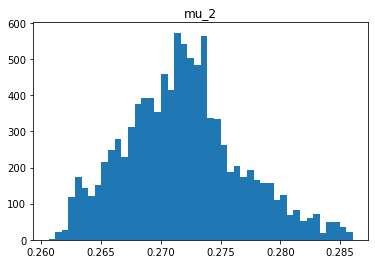

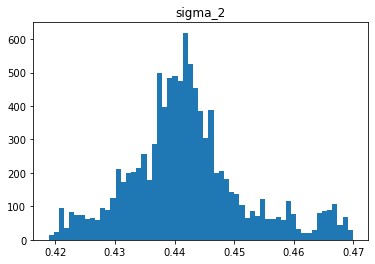

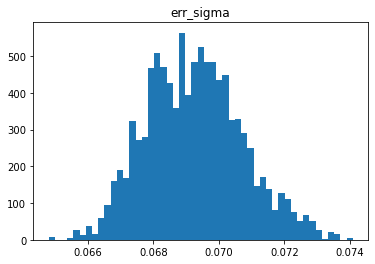

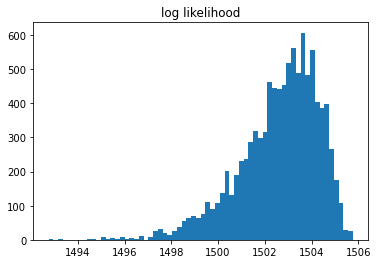

In [28]:
burnin = 10**5*2-10**4
step=1
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.hist(samples[burnin::step, i], bins='auto')
    plt.title(name)
    plt.show()

plt.hist(ll_samples[burnin::step], bins='auto')
plt.title("log likelihood")
plt.show()

In [29]:
model = curve_fit.MH(func, X, Y, [0.5]*7, [1e-4]*7, prior_prob)

model.sampling(10**5)
samples = np.array(model.samples)
ll_samples = np.array(model.ll_samples)

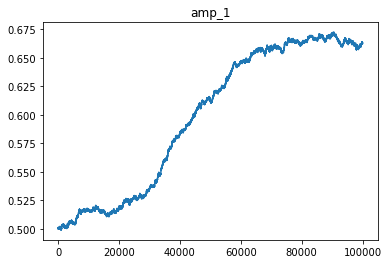

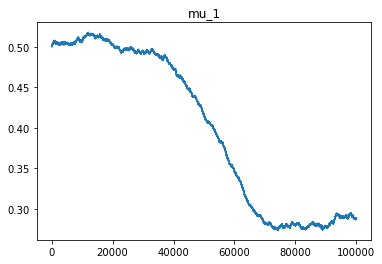

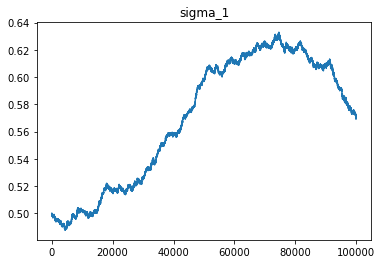

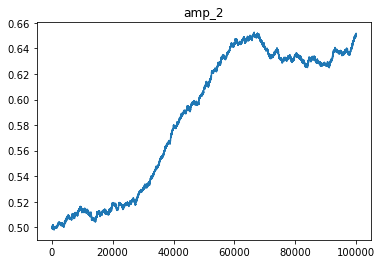

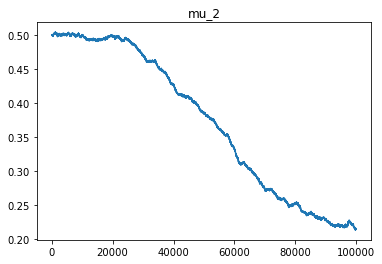

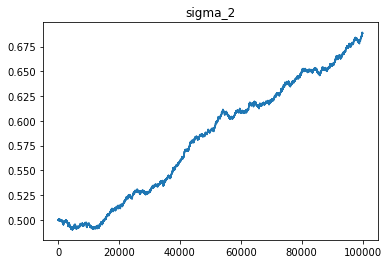

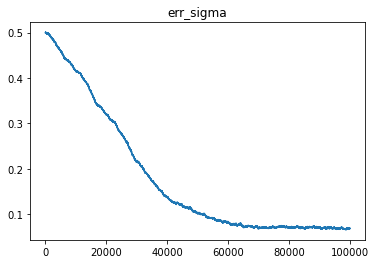

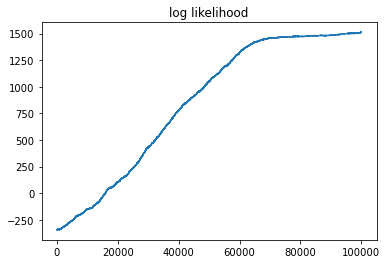

In [30]:
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.plot(samples[:, i])
    plt.title(name)
    plt.show()

plt.plot(ll_samples)
plt.title("log likelihood")
plt.show()

In [31]:
model.sampling(10**5)
samples = np.array(model.samples)
ll_samples = np.array(model.ll_samples)

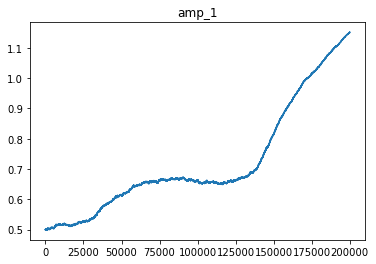

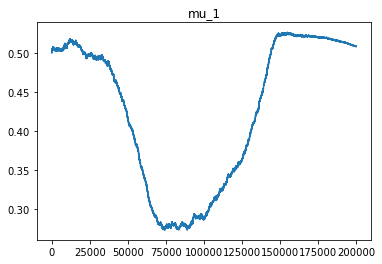

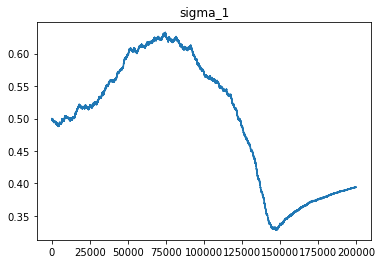

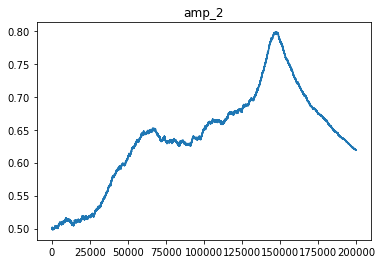

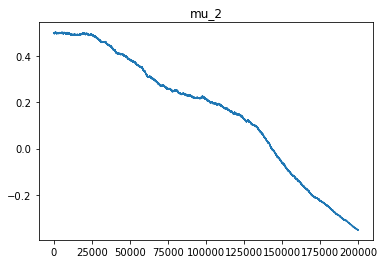

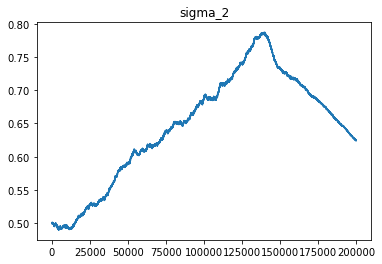

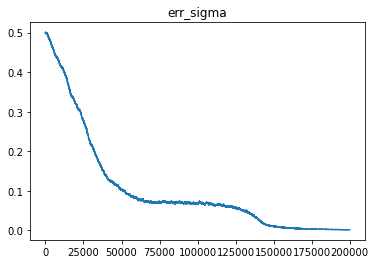

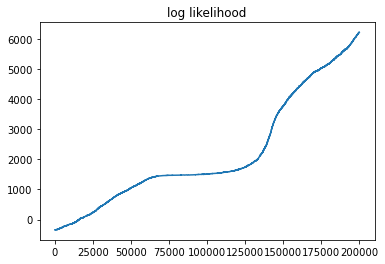

In [32]:
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.plot(samples[:, i])
    plt.title(name)
    plt.show()

plt.plot(ll_samples)
plt.title("log likelihood")
plt.show()

In [33]:
model.sampling(10**5)
samples = np.array(model.samples)
ll_samples = np.array(model.ll_samples)

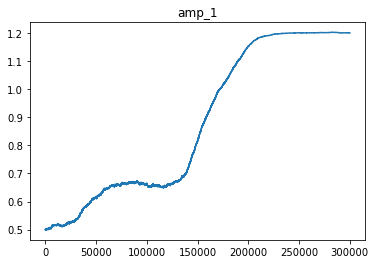

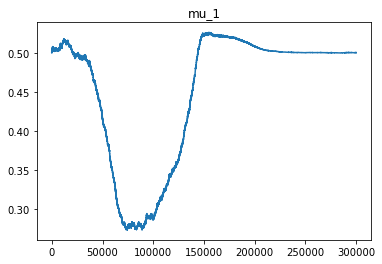

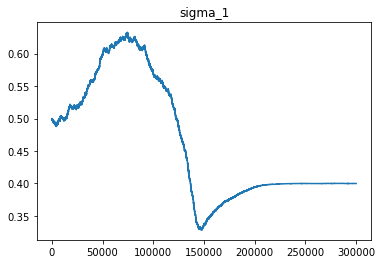

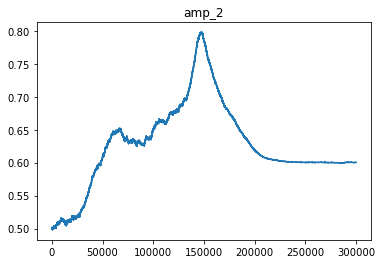

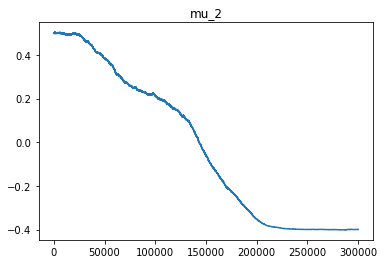

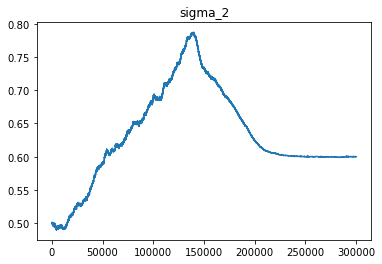

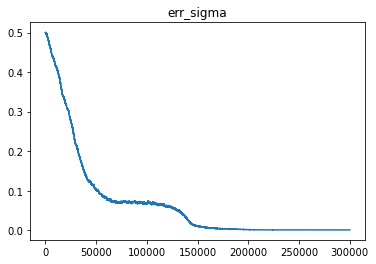

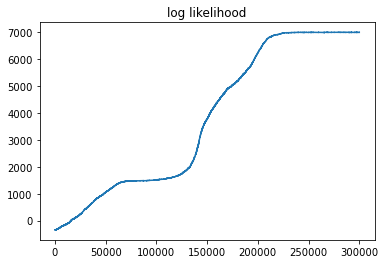

In [34]:
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.plot(samples[:, i])
    plt.title(name)
    plt.show()

plt.plot(ll_samples)
plt.title("log likelihood")
plt.show()

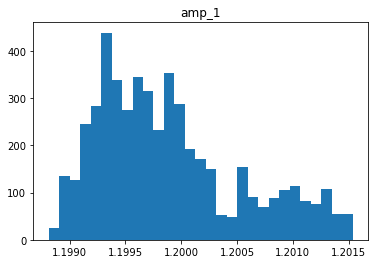

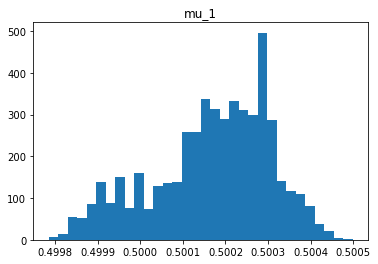

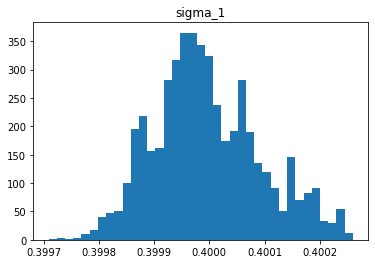

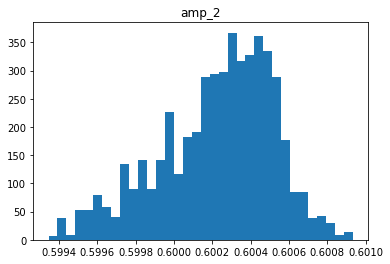

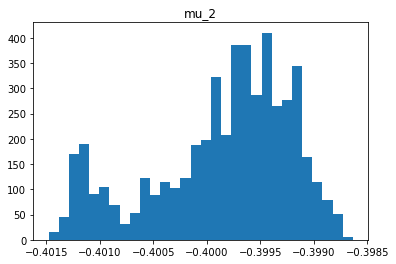

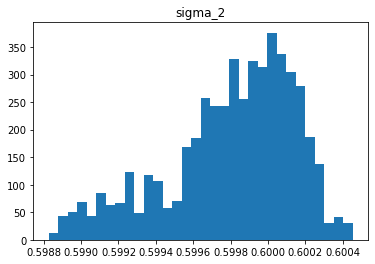

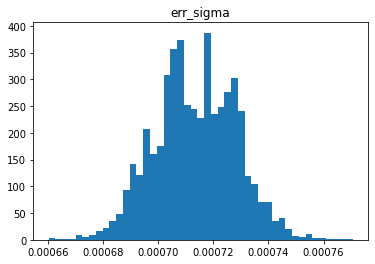

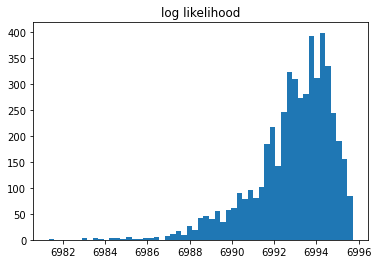

In [35]:
burnin = 10**5*3-10**4*5
step=10
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.hist(samples[burnin::step, i], bins='auto')
    plt.title(name)
    plt.show()

plt.hist(ll_samples[burnin::step], bins='auto')
plt.title("log likelihood")
plt.show()

In [36]:
samples[-10**3:, :].mean(axis=0)

array([ 1.19930586e+00,  5.00262619e-01,  3.99940034e-01,  6.00423773e-01,
       -3.99304805e-01,  6.00079809e-01,  7.17240269e-04])

In [37]:
model = curve_fit.MH(func, X, Y, samples[-10**3:, :].mean(axis=0), [2e-5]*7, prior_prob)

model.sampling(10**5)
samples = np.array(model.samples)
ll_samples = np.array(model.ll_samples)

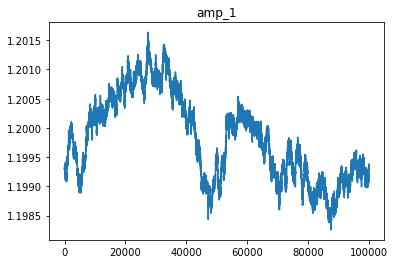

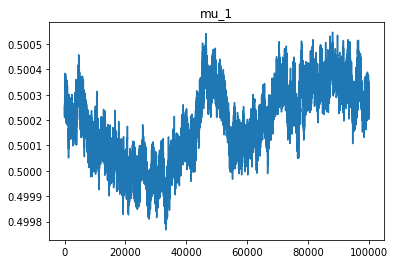

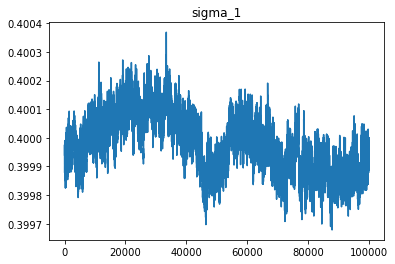

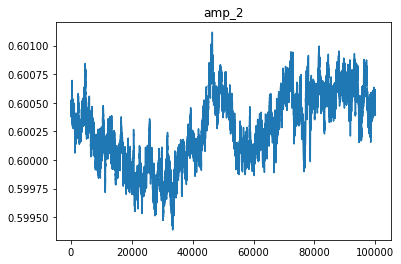

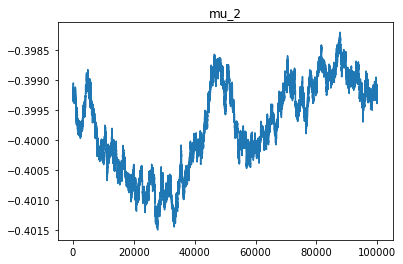

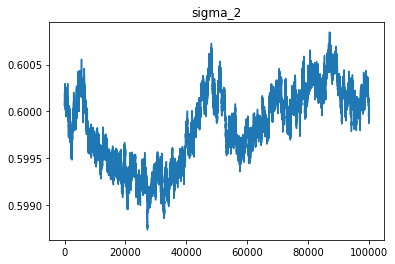

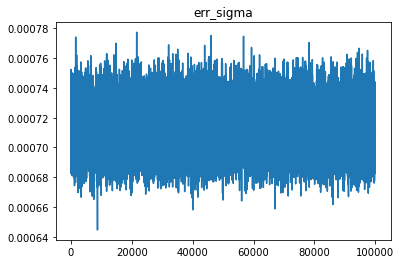

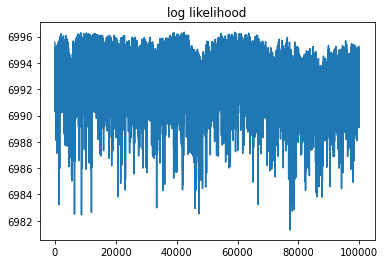

In [38]:
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.plot(samples[:, i])
    plt.title(name)
    plt.show()

plt.plot(ll_samples)
plt.title("log likelihood")
plt.show()

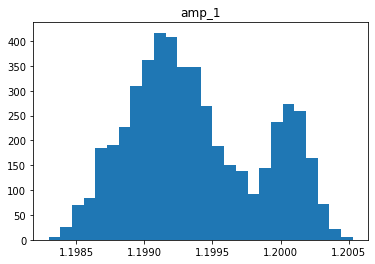

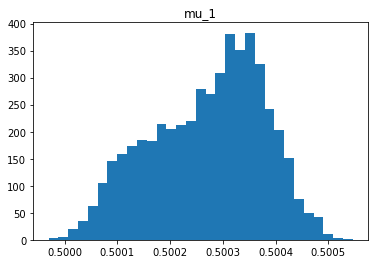

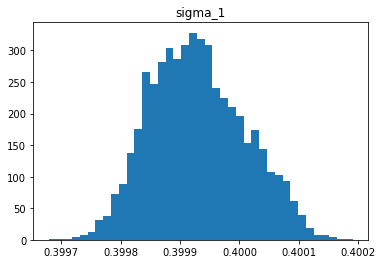

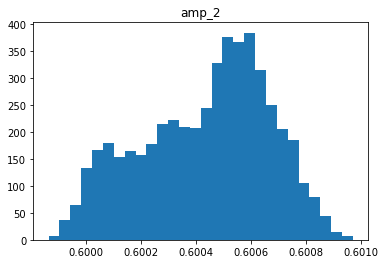

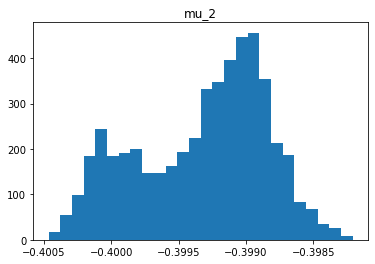

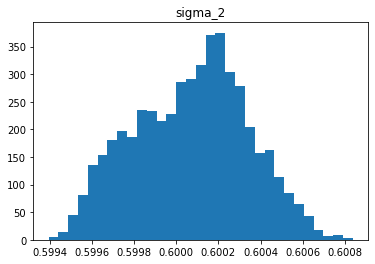

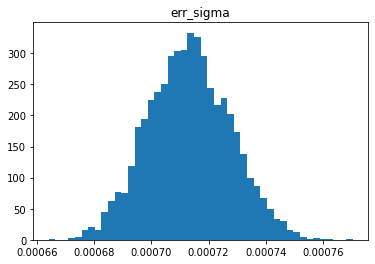

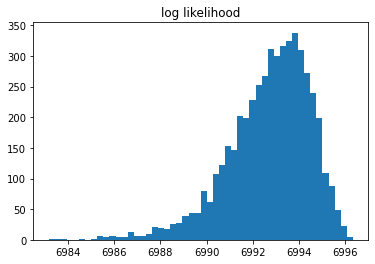

In [39]:
burnin = 10**4*5
step=10
for i,name in enumerate(["amp_1", "mu_1", "sigma_1", "amp_2", "mu_2", "sigma_2", "err_sigma"]):
    plt.hist(samples[burnin::step, i], bins='auto')
    plt.title(name)
    plt.show()

plt.hist(ll_samples[burnin::step], bins='auto')
plt.title("log likelihood")
plt.show()

In [41]:
import pymc3 as mc

AttributeError: module 'arviz' has no attribute 'geweke'